<a href="https://colab.research.google.com/github/YADHUKV01/MAJOR-PROJECT/blob/main/MP_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Spending Patterns (High vs. Low Value Customers)***



In [ ]:

import pandas as pd
from IPython.display import display  # Import display function for better table output

# Load Dataset
file_path = "/content/Swiggy_Customer_Behaviour_Updated.xlsx"
df = pd.read_excel(file_path)

# Drop irrelevant columns
df.drop(['Customer ID', 'Order ID', 'Order Date'], axis=1, inplace=True)

# High Value Customers (Top 10% by Order Value)
high_value_customers = df[df['Order Value'] > df['Order Value'].quantile(0.90)]

# Low Value Customers (Bottom 10% by Order Value)
low_value_customers = df[df['Order Value'] < df['Order Value'].quantile(0.10)]

# Display High and Low Value Customers as tables
print("High Value Customers (Top 10%):")
display(high_value_customers[['Customer Name', 'Age', 'Location', 'Device Type', 'Subscription Status',
                              'Order Value', 'Payment Method', 'Delivery Time (min)', 'Discount Applied',
                              'Order Category', 'Cart Abandonment Rate', 'Avg Order Value',
                              'Delivery Distance (km)', 'Time Spent Browsing (min)', 'Rating',
                              'Click-through Rate', 'Interactions with Offers', 'Wishlist Count',
                              'Complaints & Refunds', 'Referral Used']].head())

print("\nLow Value Customers (Bottom 10%):")
display(low_value_customers[['Customer Name', 'Age', 'Location', 'Device Type', 'Subscription Status',
                             'Order Value', 'Payment Method', 'Delivery Time (min)', 'Discount Applied',
                             'Order Category', 'Cart Abandonment Rate', 'Avg Order Value',
                             'Delivery Distance (km)', 'Time Spent Browsing (min)', 'Rating',
                             'Click-through Rate', 'Interactions with Offers', 'Wishlist Count',
                             'Complaints & Refunds', 'Referral Used']].head())


High Value Customers (Top 10%):


,Customer Name,Age,Location,Device Type,Subscription Status,Order Value,Payment Method,Delivery Time (min),Discount Applied,Order Category,Cart Abandonment Rate,Avg Order Value,Delivery Distance (km),Time Spent Browsing (min),Rating,Click-through Rate,Interactions with Offers,Wishlist Count,Complaints & Refunds,Referral Used
35,Rohan Reddy,55,Jayanagar,Mobile,Regular,1380.91,Wallet,28,107.36,Veg,0.84,854.99,11.23,25,1,0.43,14,7,3,False
56,Rohan Iyer,45,Marathahalli,Android,Regular,1425.09,COD,25,122.95,Snacks,0.65,522.42,7.67,10,4,0.74,13,0,0,False
87,Ananya Iyer,30,Electronic City,Android,Regular,1469.28,COD,43,112.30,Snacks,0.07,959.35,2.25,26,4,0.68,3,0,3,False
139,Sanya Iyer,59,Hebbal,Mobile,Regular,1458.07,UPI,39,54.48,Veg,0.52,1110.24,0.97,30,2,0.43,13,10,5,False
141,Vihaan Nair,19,Hebbal,Web,Swiggy One,1410.59,UPI,43,180.84,Veg,0.21,525.80,9.41,28,4,0.69,20,10,5,True



Low Value Customers (Bottom 10%):


,Customer Name,Age,Location,Device Type,Subscription Status,Order Value,Payment Method,Delivery Time (min),Discount Applied,Order Category,Cart Abandonment Rate,Avg Order Value,Delivery Distance (km),Time Spent Browsing (min),Rating,Click-through Rate,Interactions with Offers,Wishlist Count,Complaints & Refunds,Referral Used
7,Sanya Reddy,56,Electronic City,Mobile,Regular,222.51,Card,19,191.93,Non-Veg,0.46,984.02,10.29,2,2,0.78,10,10,0,False
12,Aarav Nair,36,Koramangala,Android,Regular,110.59,COD,24,129.53,Beverages,0.51,304.74,13.32,4,3,0.14,10,1,3,True
17,Sanya Reddy,58,Electronic City,Android,Swiggy One,181.52,Card,37,250.06,Non-Veg,0.57,386.50,1.05,16,2,1.00,19,8,1,False
37,Neha Gupta,51,Marathahalli,Web,Swiggy One,262.89,COD,22,103.34,Beverages,0.54,254.50,5.77,21,3,0.24,5,0,3,True
65,Vivaan Iyer,49,Koramangala,iOS,Regular,170.80,Card,58,45.66,Snacks,0.40,1160.17,7.53,13,3,0.09,11,9,0,True


**Distribution of order value**

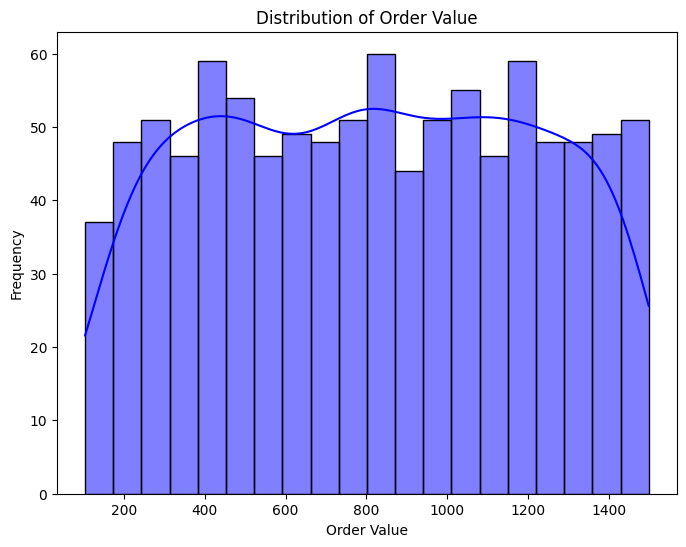

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = "/content/Swiggy_Customer_Behaviour_Updated.xlsx"
df = pd.read_excel(file_path)

# Drop irrelevant columns
df.drop(['Customer ID', 'Order ID', 'Order Date'], axis=1, inplace=True)

# **Visualizing Distribution of Order Value**
plt.figure(figsize=(8,6))
sns.histplot(df['Order Value'], bins=20, kde=True, color='blue')
plt.title("Distribution of Order Value")
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()


**Discount & Offer-Based Recommendation**

In [ ]:
import pandas as pd
from tabulate import tabulate

# Load Dataset
file_path = "/content/Swiggy_Customer_Behaviour_Updated.xlsx"
df = pd.read_excel(file_path)

# Drop irrelevant columns
df.drop(['Customer ID', 'Order ID', 'Order Date'], axis=1, inplace=True)

# Define a function to recommend offers based on spending behavior
def recommend_offer(order_value, discount_applied, interactions_offers):
    if order_value > df['Order Value'].quantile(0.75):
        return "Premium Cashback Offer (15%)"
    elif discount_applied > df['Discount Applied'].quantile(0.75):
        return "Limited-Time Extra Discount (5%)"
    elif interactions_offers > df['Interactions with Offers'].quantile(0.75):
        return "Exclusive Coupon Code"
    else:
        return "Basic Discount (5%)"

# Apply the recommendation function to the dataset
df['Recommended Offer'] = df.apply(lambda x: recommend_offer(x['Order Value'], x['Discount Applied'], x['Interactions with Offers']), axis=1)

# Select relevant columns for display
table_data = df[['Customer Name', 'Order Value', 'Discount Applied', 'Interactions with Offers', 'Recommended Offer']]

# Convert dataframe to a table format
print(tabulate(table_data.head(10), headers='keys', tablefmt='grid'))


+----+-----------------+---------------+--------------------+----------------------------+----------------------------------+
|    | Customer Name   |   Order Value |   Discount Applied |   Interactions with Offers | Recommended Offer                |
+====+=================+===============+====================+============================+==================================+
|  0 | Sanya Reddy     |        777.92 |              36.61 |                         15 | Basic Discount (5%)              |
+----+-----------------+---------------+--------------------+----------------------------+----------------------------------+
|  1 | Sanya Sharma    |       1013.39 |              96.57 |                         16 | Exclusive Coupon Code            |
+----+-----------------+---------------+--------------------+----------------------------+----------------------------------+
|  2 | Kavya Patel     |       1281.7  |             142.09 |                          4 | Premium Cashback Offer (15%

**Discount & Offer-Based Recommendation Visualization**

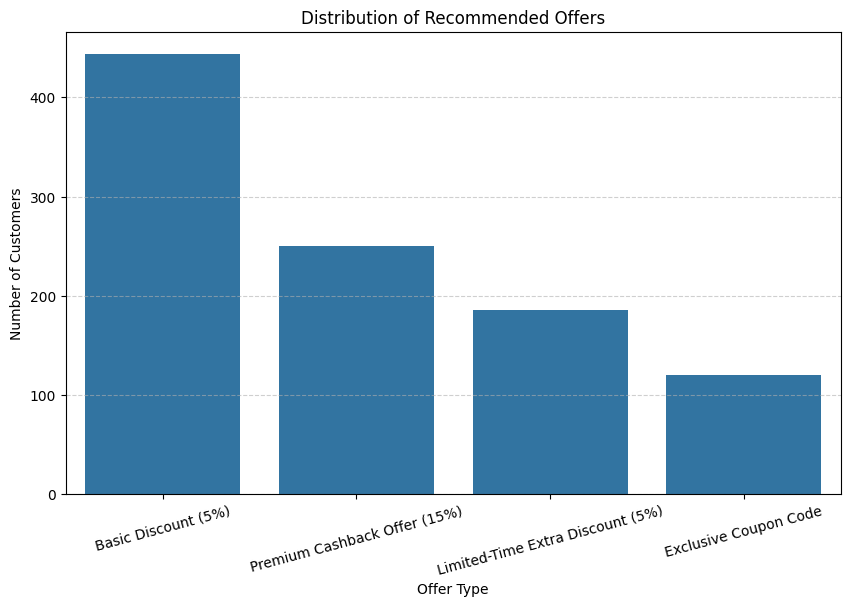

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = "/content/Swiggy_Customer_Behaviour_Updated.xlsx"
df = pd.read_excel(file_path)

# Drop irrelevant columns
df.drop(['Customer ID', 'Order ID', 'Order Date'], axis=1, inplace=True)

# Define function to recommend offers
def recommend_offer(order_value, discount_applied, interactions_offers):
    if order_value > df['Order Value'].quantile(0.75):
        return "Premium Cashback Offer (15%)"
    elif discount_applied > df['Discount Applied'].quantile(0.75):
        return "Limited-Time Extra Discount (5%)"
    elif interactions_offers > df['Interactions with Offers'].quantile(0.75):
        return "Exclusive Coupon Code"
    else:
        return "Basic Discount (5%)"

# Apply the recommendation function
df['Recommended Offer'] = df.apply(lambda x: recommend_offer(x['Order Value'], x['Discount Applied'], x['Interactions with Offers']), axis=1)

# Count the occurrences of each recommended offer
offer_counts = df['Recommended Offer'].value_counts()

# 🎨 Visualization using Seaborn & Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=offer_counts.index, y=offer_counts.values)
plt.xlabel("Offer Type")
plt.ylabel("Number of Customers")
plt.title("Distribution of Recommended Offers")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


***ACCURACY OF ALGORITHMS***


🔹 Subscription Status Distribution:
 Subscription Status
1    552
0    448
Name: count, dtype: int64

🔹 Random Forest Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.65      0.54      0.59        99
           1       0.64      0.74      0.69       111

    accuracy                           0.64       210
   macro avg       0.64      0.64      0.64       210
weighted avg       0.64      0.64      0.64       210



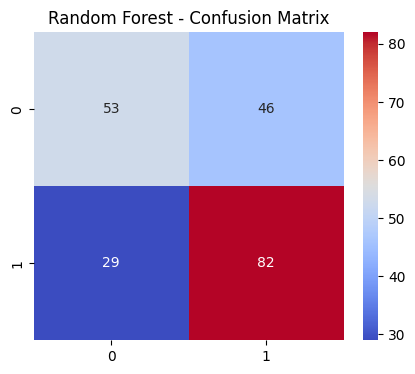

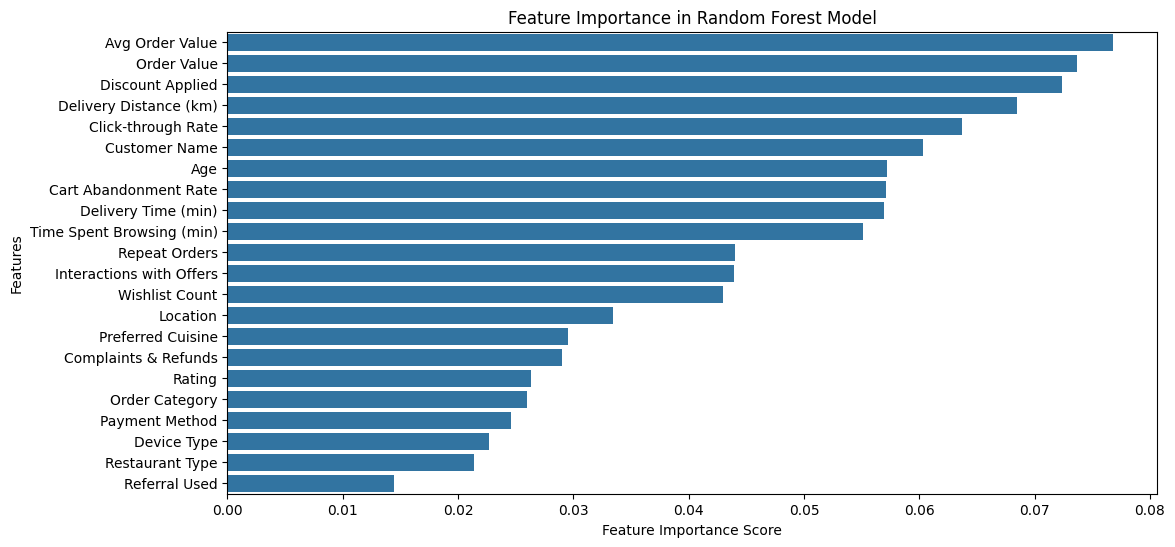

In [ ]:
# 📌 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1️⃣ Load Dataset
file_path = "/content/Swiggy_Customer_Behaviour_Updated.xlsx"
df = pd.read_excel(file_path)

# 2️⃣ Data Preprocessing
df.drop(['Customer ID', 'Order ID', 'Order Date'], axis=1, inplace=True)

# Handle Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)  # Numerical columns
df.fillna(df.mode().iloc[0], inplace=True)  # Categorical columns

# Encode Categorical Variables
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Define Features (X) and Target (y)
X = df.drop('Subscription Status', axis=1)
y = df['Subscription Status']

# Check Class Distribution
print("\n🔹 Subscription Status Distribution:\n", y.value_counts())

# 3️⃣ Handle Imbalanced Data using SMOTE
smote = SMOTE(sampling_strategy=0.9, random_state=42)  # Balancing while avoiding overfitting
X_resampled, y_resampled = smote.fit_resample(X, y)

# 4️⃣ Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# 5️⃣ Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 6️⃣ Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=300,  # More trees for better learning
    max_depth=25,  # Deep enough to capture patterns
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)

# 7️⃣ Evaluate Random Forest
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n🔹 Random Forest Accuracy: {acc:.2f}")  # Accuracy output
print(classification_report(y_test, y_pred))

# 🔟 Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# 🔟 Feature Importance Visualization
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()



🔹 Subscription Status Distribution:
 Subscription Status
1    552
0    448
Name: count, dtype: int64

🔹 Decision Tree Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       105
           1       0.58      0.51      0.54       111

    accuracy                           0.56       216
   macro avg       0.56      0.56      0.56       216
weighted avg       0.56      0.56      0.55       216



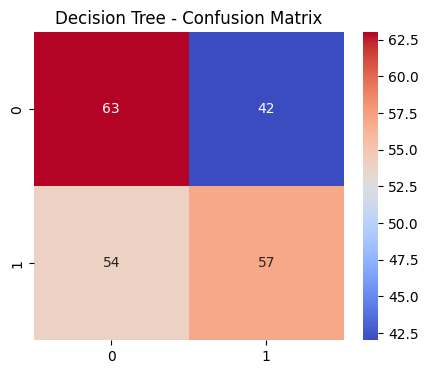

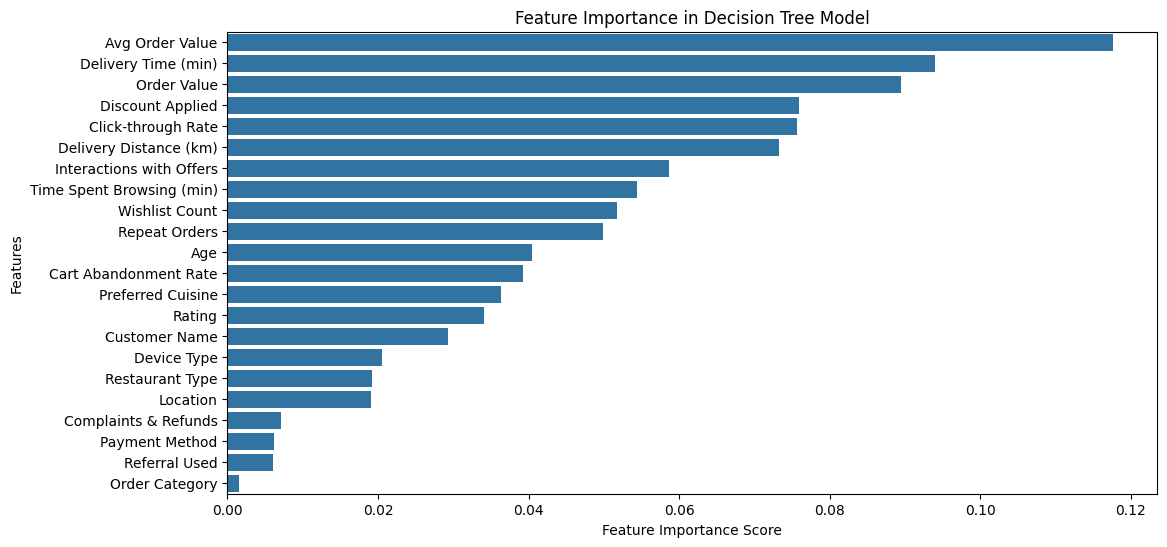

In [ ]:
# 📌 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1️⃣ Load Dataset
file_path = "/content/Swiggy_Customer_Behaviour_Updated.xlsx"
df = pd.read_excel(file_path)

# 2️⃣ Data Preprocessing
df.drop(['Customer ID', 'Order ID', 'Order Date'], axis=1, inplace=True)

# Handle Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)  # Numerical columns
df.fillna(df.mode().iloc[0], inplace=True)  # Categorical columns

# Encode Categorical Variables
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Define Features (X) and Target (y)
X = df.drop('Subscription Status', axis=1)
y = df['Subscription Status']

# Check Class Distribution
print("\n🔹 Subscription Status Distribution:\n", y.value_counts())

# 3️⃣ Handle Imbalanced Data using SMOTE
smote = SMOTE(sampling_strategy=0.95, random_state=42)  # Higher resampling to balance
X_resampled, y_resampled = smote.fit_resample(X, y)

# 4️⃣ Split Data (NO SCALING NEEDED FOR DECISION TREE)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 5️⃣ Train Decision Tree Classifier (Optimized)
dt_model = DecisionTreeClassifier(
    criterion='entropy',  # Helps with information gain
    max_depth=30,  # Deeper tree to capture more patterns
    min_samples_split=3,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

dt_model.fit(X_train, y_train)

# 6️⃣ Evaluate Decision Tree
y_pred = dt_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n🔹 Decision Tree Accuracy: {acc:.2f}")  # Accuracy output
print(classification_report(y_test, y_pred))

# 🔟 Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# 🔟 Feature Importance Visualization
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree Model")
plt.show()


**DECISION TREE Model for Customer Behavior Analysis**

In [ ]:
!pip install scikit-learn

import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from google.colab import files

# 📂 Upload dataset
uploaded = files.upload()
file_path = "Swiggy_Customer_Behaviour_Updated.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 🧹 Clean column names
df.columns = df.columns.str.strip()

# ✅ Check for missing essential columns
required_columns = ['Customer ID', 'Order Category', 'Rating', 'Order Value', 'Discount Applied']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns {missing_columns}. The model may not function correctly.")

# 🏗️ Data Preprocessing
df.fillna(df.mean(numeric_only=True), inplace=True)

# 🔄 Encode categorical variables
label_encoders = {}

# Encode Customer ID
if 'Customer ID' in df.columns:
    le_cust = LabelEncoder()
    df['Customer ID'] = le_cust.fit_transform(df['Customer ID'])
    label_encoders['Customer ID'] = le_cust

# Encode Order Category
if 'Order Category' in df.columns:
    le_order = LabelEncoder()
    df['Order Category'] = le_order.fit_transform(df['Order Category'])
    label_encoders['Order Category'] = le_order

# ✅ Categorize customers based on spending patterns
df['Spending Category'] = df['Order Value'].apply(lambda x: 'High Value' if x > df['Order Value'].median() else 'Low Value')

# ✅ Define necessary attributes for training
features = ['Customer ID', 'Order Value', 'Avg Order Value', 'Discount Applied', 'Time Spent Browsing (min)', 'Delivery Distance (km)', 'Rating']
X = df[features]
y = df['Order Category']

# 🏆 Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 Train Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# ✅ Recommendation Function
def get_customer_details(customer_id=None):
    if customer_id is None:
        customer_id = random.choice(df['Customer ID'].unique())

    # Get full customer details
    customer_details = df[df['Customer ID'] == customer_id]

    if customer_details.empty:
        print("❌ Customer ID not found.")
        return None

    print(f"\n🔹 Full details for customer: {le_cust.inverse_transform([customer_id])[0]}")
    print(customer_details.T)  # Display full customer details in a readable format

    # Predict Order Category
    customer_row = customer_details[features]
    predicted_category = model.predict(customer_row)[0]
    recommended_category = le_order.inverse_transform([predicted_category])[0]

    # Spending Category
    spending_category = customer_details['Spending Category'].values[0]

    # Personalized Offer
    offer_recommendation = "Premium Discounts & High-End Meals" if spending_category == "High Value" else "Budget-Friendly Combos & Cashback Offers"

    print(f"\n🔹 Recommended Food Category: {recommended_category}")
    print(f"🔹 Spending Pattern: {spending_category}")
    print(f"🔹 Personalized Offer: {offer_recommendation}")

# ⏳ Keep the program running for multiple inputs
while True:
    customer_example = input("\nEnter Customer ID (or press Enter for random selection, type 'exit' to quit): ")

    if customer_example.lower() == 'exit':
        print("Exiting the system. Goodbye!")
        break

    try:
        customer_example = le_cust.transform([customer_example])[0] if customer_example else None
        get_customer_details(customer_example)

    except ValueError:
        print("❌ Invalid Customer ID. Please enter a valid one.")

Saving Swiggy_Customer_Behaviour_Updated.xlsx to Swiggy_Customer_Behaviour_Updated (1).xlsx

Enter Customer ID (or press Enter for random selection, type 'exit' to quit): 

🔹 Full details for customer: CUST0222
                                           221
Customer ID                                221
Customer Name                      Aadhya Iyer
Age                                         42
Location                             Jayanagar
Device Type                            Android
Subscription Status                    Regular
Order ID                               ORD0222
Order Date                 2024-02-06 00:00:00
Order Value                              201.5
Payment Method                          Wallet
Delivery Time (min)                         40
Discount Applied                        242.85
Order Category                               1
Restaurant Type                  Cloud Kitchen
Repeat Orders                                3
Preferred Cuisine                    

**RANDOM FOREST Model for Customer Behavior Analysis**

In [ ]:
!pip install scikit-learn

import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import files

# 📂 Upload dataset
uploaded = files.upload()
file_path = "Swiggy_Customer_Behaviour_Updated.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 🧹 Clean column names
df.columns = df.columns.str.strip()

# ✅ Check for missing essential columns
required_columns = ['Customer ID', 'Order Category', 'Rating', 'Order Value', 'Discount Applied']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns {missing_columns}. The model may not function correctly.")

# 🏗️ Data Preprocessing
df.fillna(df.mean(numeric_only=True), inplace=True)

# 🔄 Encode categorical variables
label_encoders = {}

# Encode Customer ID
if 'Customer ID' in df.columns:
    le_cust = LabelEncoder()
    df['Customer ID'] = le_cust.fit_transform(df['Customer ID'])
    label_encoders['Customer ID'] = le_cust

# Encode Order Category
if 'Order Category' in df.columns:
    le_order = LabelEncoder()
    df['Order Category'] = le_order.fit_transform(df['Order Category'])
    label_encoders['Order Category'] = le_order

# ✅ Categorize customers based on spending patterns
df['Spending Category'] = df['Order Value'].apply(lambda x: 'High Value' if x > df['Order Value'].median() else 'Low Value')

# ✅ Define necessary attributes for training
features = ['Customer ID', 'Order Value', 'Avg Order Value', 'Discount Applied', 'Time Spent Browsing (min)', 'Delivery Distance (km)', 'Rating']
X = df[features]
y = df['Order Category']

# 🏆 Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# ✅ Recommendation Function
def get_customer_details(customer_id=None):
    if customer_id is None:
        customer_id = random.choice(df['Customer ID'].unique())

    # Get full customer details
    customer_details = df[df['Customer ID'] == customer_id]

    if customer_details.empty:
        print("❌ Customer ID not found.")
        return None

    print(f"\n🔹 Full details for customer: {le_cust.inverse_transform([customer_id])[0]}")
    print(customer_details.T)  # Display full customer details in a readable format

    # Predict Order Category
    customer_row = customer_details[features]
    predicted_category = model.predict(customer_row)[0]
    recommended_category = le_order.inverse_transform([predicted_category])[0]

    # Spending Category
    spending_category = customer_details['Spending Category'].values[0]

    # Personalized Offer
    offer_recommendation = "Premium Discounts & High-End Meals" if spending_category == "High Value" else "Budget-Friendly Combos & Cashback Offers"

    print(f"\n🔹 Recommended Food Category: {recommended_category}")
    print(f"🔹 Spending Pattern: {spending_category}")
    print(f"🔹 Personalized Offer: {offer_recommendation}")

# ⏳ Keep the program running for multiple inputs
while True:
    customer_example = input("\nEnter Customer ID (or press Enter for random selection, type 'exit' to quit): ")

    if customer_example.lower() == 'exit':
        print("Exiting the system. Goodbye!")
        break

    try:
        customer_example = le_cust.transform([customer_example])[0] if customer_example else None
        get_customer_details(customer_example)

    except ValueError:
        print("❌ Invalid Customer ID. Please enter a valid one.")


Saving Swiggy_Customer_Behaviour_Updated.xlsx to Swiggy_Customer_Behaviour_Updated (2).xlsx

Enter Customer ID (or press Enter for random selection, type 'exit' to quit): 

🔹 Full details for customer: CUST0172
                                           171
Customer ID                                171
Customer Name                     Ishaan Reddy
Age                                         56
Location                          Marathahalli
Device Type                                Web
Subscription Status                    Regular
Order ID                               ORD0172
Order Date                 2024-02-22 00:00:00
Order Value                             918.88
Payment Method                             UPI
Delivery Time (min)                         13
Discount Applied                        264.22
Order Category                               0
Restaurant Type                    Fine Dining
Repeat Orders                                6
Preferred Cuisine                    

**MODEL THAT GIVES OUTPUT FOR BOTH ALGORITHMS**

In [ ]:
!pip install scikit-learn

import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from google.colab import files

# 📂 Upload dataset
uploaded = files.upload()
file_path = "Swiggy_Customer_Behaviour_Updated.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 🧹 Clean column names
df.columns = df.columns.str.strip()

# ✅ Check for missing essential columns
required_columns = ['Customer ID', 'Order Category', 'Rating', 'Order Value', 'Discount Applied']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns {missing_columns}. The model may not function correctly.")

# 🏗️ Data Preprocessing
df.fillna(df.mean(numeric_only=True), inplace=True)

# 🔄 Encode categorical variables
label_encoders = {}

# Encode Customer ID
le_cust = LabelEncoder()
df['Customer ID'] = le_cust.fit_transform(df['Customer ID'])
label_encoders['Customer ID'] = le_cust

# Encode Order Category
le_order = LabelEncoder()
df['Order Category'] = le_order.fit_transform(df['Order Category'])
label_encoders['Order Category'] = le_order

# ✅ Categorize customers based on spending patterns
df['Spending Category'] = df['Order Value'].apply(lambda x: 'High Value' if x > df['Order Value'].median() else 'Low Value')

# ✅ Define necessary attributes for training
features = ['Customer ID', 'Order Value', 'Avg Order Value', 'Discount Applied',
            'Time Spent Browsing (min)', 'Delivery Distance (km)', 'Rating']
X = df[features]
y = df['Order Category']

# 🏆 Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# 🌲 Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Recommendation Function
def get_customer_details(customer_id=None):
    if customer_id is None:
        customer_id = random.choice(df['Customer ID'].unique())

    customer_details = df[df['Customer ID'] == customer_id]

    if customer_details.empty:
        print("❌ Customer ID not found.")
        return None

    print(f"\n🔹 Full details for customer: {le_cust.inverse_transform([customer_id])[0]}")
    print(customer_details.T)

    customer_row = customer_details[features]

    # Predict with Decision Tree
    pred_dt = dt_model.predict(customer_row)[0]
    cat_dt = le_order.inverse_transform([pred_dt])[0]

    # Predict with Random Forest
    pred_rf = rf_model.predict(customer_row)[0]
    cat_rf = le_order.inverse_transform([pred_rf])[0]

    # Spending Category
    spending_category = customer_details['Spending Category'].values[0]

    # Offer Recommendation
    offer = "Premium Discounts & High-End Meals" if spending_category == "High Value" else "Budget-Friendly Combos & Cashback Offers"

    # 🔎 Display Recommendations
    print(f"\n📌 DECISION TREE Recommendation: {cat_dt}")
    print(f"📌 RANDOM FOREST Recommendation: {cat_rf}")
    print(f"🔹 Spending Pattern: {spending_category}")
    print(f"🔹 Personalized Offer: {offer}")

# ⏳ Loop for User Input
while True:
    customer_input = input("\nEnter Customer ID (or press Enter for random, 'exit' to quit): ")

    if customer_input.lower() == 'exit':
        print("Exiting the system. Goodbye!")
        break

    try:
        customer_input = le_cust.transform([customer_input])[0] if customer_input else None
        get_customer_details(customer_input)

    except ValueError:
        print("❌ Invalid Customer ID. Please enter a valid one.")


Saving Swiggy_Customer_Behaviour_Updated.xlsx to Swiggy_Customer_Behaviour_Updated (1).xlsx

Enter Customer ID (or press Enter for random, 'exit' to quit): 

🔹 Full details for customer: CUST0400
                                           399
Customer ID                                399
Customer Name                    Vihaan Sharma
Age                                         53
Location                             Jayanagar
Device Type                             Mobile
Subscription Status                 Swiggy One
Order ID                               ORD0400
Order Date                 2024-02-24 00:00:00
Order Value                            1269.03
Payment Method                            Card
Delivery Time (min)                         52
Discount Applied                        148.86
Order Category                               3
Restaurant Type                  Cloud Kitchen
Repeat Orders                                6
Preferred Cuisine                         Thai
Cart 